# Example 006: Imported Field Trajectory

In this example the trajectory is calculated for a field coming from an imported data file.  We first creat the data file by adding some undulator field, some noise, and exporting the field to a file.  Several formats are possible (for more information see the All About Magnetic Fields tutorial.

In [1]:
# This has nothing to do with OSCARS, but it puts the matplotlib plots inline in the notebook
%matplotlib inline

# Import the OSCARS SR module
import oscars.sr

# Import basic plot utilities (matplotlib).  You don't need these to run OSCARS, but it's used here for basic plots
from oscars.plots_mpl import *

OSCARS v1.31.05 - Open Source Code for Advanced Radiation Simulation
Brookhaven National Laboratory, Upton NY, USA
http://oscars.bnl.gov
oscars@bnl.gov


In [2]:
# Create a new OSCARS SR object
osr = oscars.sr.sr()

## Create a Magnetic field and Export it to a file

We are only doing this so you don't have to download many data files.

In [3]:
# Clear any existing fields (just good habit in notebook style) and add an undulator field
osr.clear_bfields()
osr.add_bfield_undulator(bfield=[0, 1, 0], period=[0, 0, 0.049], nperiods=41)

# Add some random imperfections
for i in range(10):
    osr.add_bfield_gaussian(bfield=[0, 0.001 * (osr.rand() - 0.5), 0],
                            sigma=[0, 0, 0.1*(osr.rand())],
                            translation=[0, 0, 2 * (osr.rand() - 0.5)])


# Export the field
osr.write_bfield(ofile='EX006.dat', oformat='OSCARS', zlim=[-3, 3], nz=50000)

## Import the magnetic field

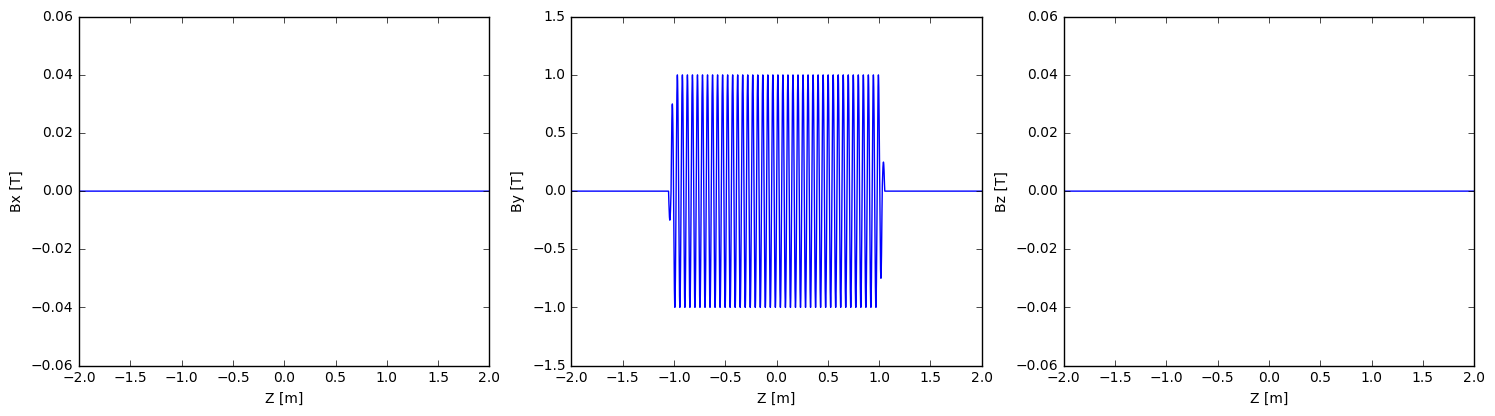

In [4]:
# Clear all magnetic fields!
osr.clear_bfields()

# Import the field from the file created above
osr.add_bfield_file(ifile='EX006.dat', iformat='OSCARS')

# Plot imported field
plot_bfield(osr, -2, 2)

## Add a particle beam

Now we add a simple particle beam.  There are a few important things to understand about the setup of magnetic fields and particle beams, namely positions and times.  You can define the initial position and time of a particle beam to be anywhere you like.  The default initial time for a beam is t=0.  You must specify the initial position, which for this simple example it is recommended to be *before* the undulator (in the plot at z=-3 [m] is a good choice if the particle beam is defined to be going in the +z direction as is done below.

One must specify ctstartstop.  This is the start and stop time of the calculation.  In this example we will start the calculation at t=0 and go to t=6 (given in units of ct) since the beam is relativistic.  In this example you can specify the start time as less than 0 which is useful if you want to propogate the particle backwars in time.  This is useful for instance if you have a bending magnet before the undulator that you wish to include.

clear_particle_beams() is called, again for convenience, but it is not necessary.

In [5]:
# Setup beam similar to NSLSII with different starting position from above
# (this makes more sense for some scenarios)
osr.clear_particle_beams()
osr.set_particle_beam(type='electron',
                      name='beam_0',
                      x0=[0, 0, -3],
                      d0=[0, 0, 1],
                      energy_GeV=3,
                      current=0.500
                     )

# Set the start and stop times for the calculation
osr.set_ctstartstop(0, 6)

## Calculate Trajectory

Now we calculate the trajectory and plot it.  It is enough to call calculate_trajectory().  If you are doing other calculations (flux, spectra, power density) it is not necesary to call this since it is called internally.

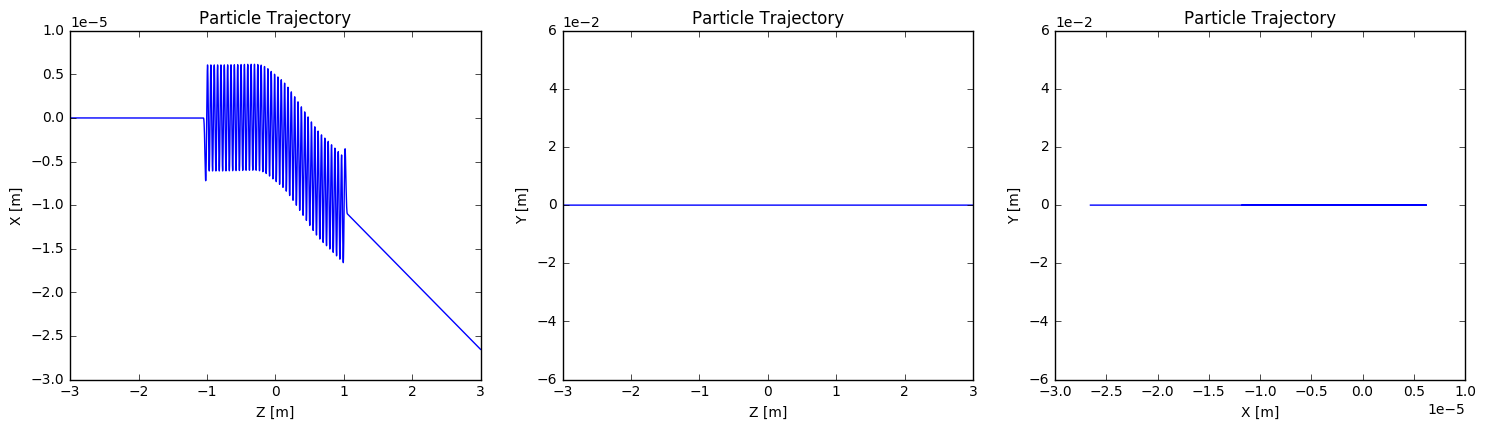

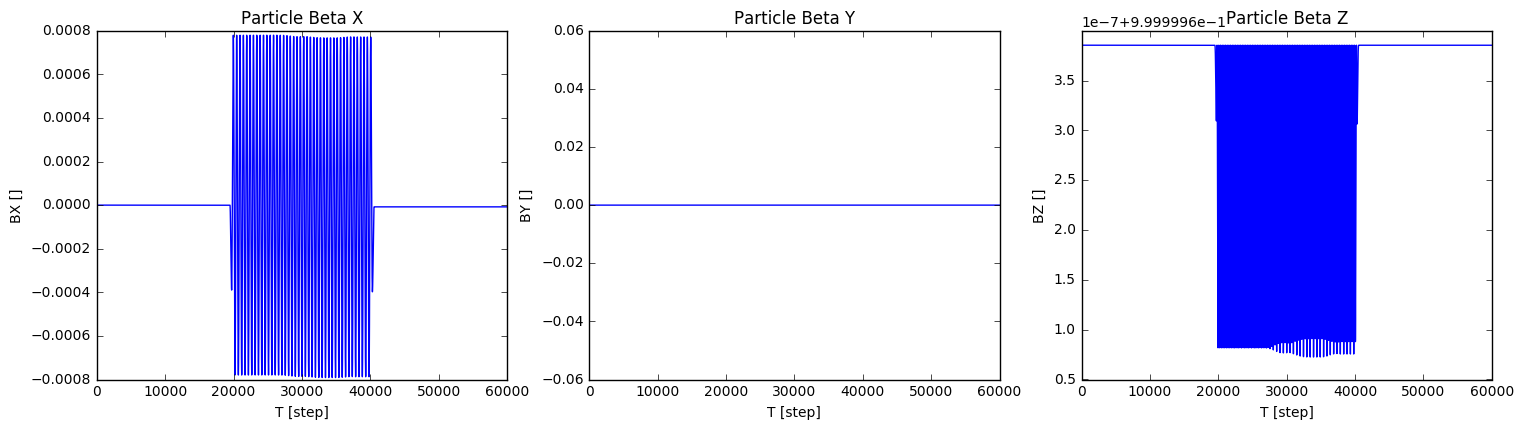

In [6]:
# Run the particle trajectory calculation
trajectory = osr.calculate_trajectory()

# Plot the trajectory position and velocity
plot_trajectory_position(trajectory)
plot_trajectory_velocity(trajectory)

In [7]:
# If you want to convert the notebook to HTML
import os
os.system('jupyter nbconvert --to html Example_006_ImportedFieldTrajectory.ipynb')

0